<a href="https://colab.research.google.com/github/talalba/mixed_data_retail/blob/master/main_numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import concatenate
import numpy as np
import argparse
import locale
import os
import pandas as pd
import csv
import glob
import os
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.io import imread
from sklearn.model_selection import train_test_split
from pandas import read_excel
import cv2
import pathlib
import multiprocessing
from joblib import Parallel, delayed
num_cores = multiprocessing.cpu_count()
# from models import models
import importlib
import locale
from random import randrange
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
# drive.mount('/content/drive')
import gzip
import MySQLdb



In [0]:
directoryPath = '/content/drive/My Drive/'
# ! ls /content/drive/My\ Drive/
f = gzip.GzipFile(directoryPath+'data_images.npy.gz', "r")
data_images = np.load(f)
train_data_with_images = pd.read_pickle(directoryPath+'dbo.train_data_with_images.pkl')
target_variable = 'Impressions'



In [0]:
# define db connection
DB_HOST = 'xyyz.xyx.com'
DB_DATABASE = 'xyyz'
DB_USERNAME = 'xyyz'
DB_PASSWORD = 'xyyz'
DB_PORT = 3306

db_conn = MySQLdb.connect(host=DB_HOST,    # your host, usually localhost
                          user=DB_USERNAME,         # your username
                          passwd=DB_PASSWORD,  # your password
                          db=DB_DATABASE)
cur = db_conn.cursor()

query = 'Select * from table'

data = pd.read_sql(query,db_conn)



In [0]:
print(data_images.shape)
print(train_data_with_images.shape)

(788, 128, 128, 3)
(788, 6)


In [0]:
df = train_data_with_images.drop(['Id_x'],axis=1)

# df['CPM'] = np.log(df['CPM'])
images = data_images

split = train_test_split(df, images, test_size=0.4, random_state=42)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split


# cs = MinMaxScaler()
trainX = cs.fit_transform(trainAttrX.drop([target_variable],axis=1))
testX = cs.transform(testAttrX.drop([target_variable],axis=1))

# trainX = trainAttrX.drop([target_variable],axis=1).values
# testX = testAttrX.drop([target_variable],axis=1).values


trainX.shape
testX.shape

# trainAttrX[target_variable] = np.log(trainAttrX[target_variable])

maxPrice = trainAttrX[target_variable].max()
trainY = (trainAttrX[target_variable]/ maxPrice).values
testY = (testAttrX[target_variable]/ maxPrice).values

# trainY = (trainAttrX[target_variable]).values
# testY = (testAttrX[target_variable]).values


In [0]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras import optimizers

model = Sequential()
model.add(Dense(15, input_dim=trainX.shape[1], activation="relu"))
# model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation="linear"))

opt = Adam(lr=1e-4, decay=1e-2 / 200)
# opt = optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False)

model.compile(loss="mean_squared_error", optimizer=opt)
# train the model
print("[INFO] training model...")
model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=200, batch_size=8)
preds = model.predict(testX)
#

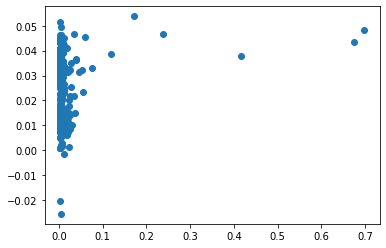

In [0]:
plt.scatter(testY,preds.flatten())
